In [84]:
import pandas as pd
import requests
import json as js
import numpy as np
import matplotlib.pyplot as plt
import tweepy as tw
import os


# Gathering data

### Enhanced Twitter Archive

In [3]:
#load twitter archive file into pandas df.
df_arch = pd.read_csv('E:/FWD/dogs/twitter-archive-enhanced.csv')

### Image Predictions File

In [6]:
#download image predictions file.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# GET the file name programmatically
file_name = url.split('/')[-1]

# Write the file with the context manager with:
with open(file_name, 'wb') as file:
     file.write(response.content)

In [7]:
# load image predictions file into pandas df.
df_pred = pd.read_csv('image-predictions.tsv', sep='\t')

### Download Tweet JSON Data

##### unfortunatly my twitter developer account isnt verified yet so rather I am typing the code but I am using the file downladed from calssroom

In [ ]:
#consumer_key= '!!!!!!!!!'
#consumer_secret= '!!!!!!!!!'
#access_token= '!!!!!-!!!!!!!'
#access_token_secret= '!!!!!!!!!'

#auth = tw.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_token_secret)
#api = tw.API(auth, wait_on_rate_limit=True)

In [93]:
#loading tweets json into list and get only tweet id, retweet count, favorite count 

tweet_json = []
with open('E:/FWD/dogs/tweet-json.txt') as file:
    for line in file:
        lin = js.loads(line)
        tweet_json.append({'tweet_id':lin['id'],
                           'retweet_count':lin['retweet_count'],
                           'favorite_count':lin['favorite_count']})

In [115]:
#convert tweet list to dataframe
df_j = pd.DataFrame(tweet_json, columns = ['tweet_id', 'retweet_count', 'favorite_count'])


# Assess Data

In [136]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [29]:
df_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [30]:
df_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [31]:
df_arch.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [47]:
df_arch[df_arch.rating_numerator<(10)].count()[0]

440

In [52]:
df_arch[df_arch.rating_numerator<(10)].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 440, dtype: int64

In [55]:
df_arch.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [63]:
df_arch[df_arch.rating_denominator!=10].count()[0]

23

In [64]:
df_arch[df_arch.rating_denominator==0].count()[0]

1

In [96]:
df_arch.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Robin        1
Hall         1
Pip          1
BeBe         1
Sailor       1
Name: name, Length: 957, dtype: int64

In [102]:
df_arch.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [101]:
df_arch.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Robin        1
Hall         1
Pip          1
BeBe         1
Sailor       1
Name: name, Length: 957, dtype: int64

In [24]:
df_pred.head(100)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
96,667724302356258817,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1,ibex,0.619098,False,bighorn,0.125119,False,ram,0.074673,False
97,667728196545200128,https://pbs.twimg.com/media/CUQ_QahUAAAVQjn.jpg,1,kuvasz,0.360159,True,golden_retriever,0.293744,True,Labrador_retriever,0.270673,True
98,667766675769573376,https://pbs.twimg.com/media/CURiQMnUAAAPT2M.jpg,1,fire_engine,0.883493,False,tow_truck,0.074734,False,jeep,0.012773,False


In [22]:
df_pred['p1_dog'=False]

SyntaxError: invalid syntax (<ipython-input-22-eed2ba6c71b7>, line 1)

In [68]:
df_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1091,719367763014393856,https://pbs.twimg.com/media/Cfu1KSRXEAACC5X.jpg,1,swing,0.171486,False,soft-coated_wheaten_terrier,0.050971,True,Tibetan_terrier,0.047759,True
992,708109389455101952,https://pbs.twimg.com/media/CdO1u9vWAAApj2V.jpg,1,Staffordshire_bullterrier,0.516106,True,American_Staffordshire_terrier,0.236075,True,kelpie,0.069750,True
597,679530280114372609,https://pbs.twimg.com/media/CW4tL1vWcAIw1dw.jpg,1,dalmatian,0.750256,True,jaguar,0.169007,False,zebra,0.006481,False
408,673711475735838725,https://pbs.twimg.com/media/CVmA_osW4AArAU1.jpg,1,Maltese_dog,0.607401,True,toy_poodle,0.143836,True,Sealyham_terrier,0.063907,True
1478,780601303617732608,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,Saint_Bernard,0.995143,True,Cardigan,0.003044,True,English_springer,0.001050,True
1865,843235543001513987,https://pbs.twimg.com/media/C7PGQJAWwAAibui.jpg,1,Pembroke,0.958452,True,Cardigan,0.023770,True,Chihuahua,0.005269,True
552,677565715327688705,https://pbs.twimg.com/media/CWcybBmWcAAigAQ.jpg,1,basset,0.397295,True,Welsh_springer_spaniel,0.199554,True,purse,0.105641,False
616,680191257256136705,https://pbs.twimg.com/media/CXCGVXyWsAAAVHE.jpg,1,Brittany_spaniel,0.733253,True,Welsh_springer_spaniel,0.251634,True,English_springer,0.009243,True
675,683449695444799489,https://pbs.twimg.com/media/CXwZ3pbWsAAriTv.jpg,1,Lakeland_terrier,0.303512,True,soft-coated_wheaten_terrier,0.211424,True,golden_retriever,0.170725,True
240,670442337873600512,https://pbs.twimg.com/media/CU3jwAYWwAAhdAv.jpg,1,Sussex_spaniel,0.403552,True,otterhound,0.256302,True,Irish_terrier,0.187315,True


In [69]:
df_pred.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [72]:
df_pred.loc[597,'jpg_url']

'https://pbs.twimg.com/media/CW4tL1vWcAIw1dw.jpg'

In [73]:
from IPython.display import Image
Image(url='https://pbs.twimg.com/media/CW4tL1vWcAIw1dw.jpg')

In [74]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [119]:
df_j.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


<AxesSubplot:xlabel='retweet_count'>

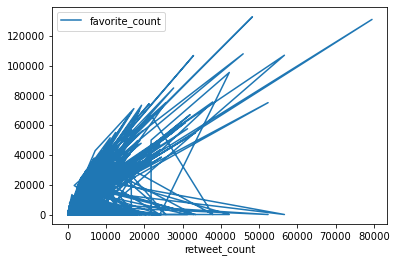

In [131]:
df_j.plot(x='retweet_count',y='favorite_count')

array([[<AxesSubplot:title={'center':'tweet_id'}>,
        <AxesSubplot:title={'center':'in_reply_to_status_id'}>,
        <AxesSubplot:title={'center':'in_reply_to_user_id'}>],
       [<AxesSubplot:title={'center':'retweeted_status_id'}>,
        <AxesSubplot:title={'center':'retweeted_status_user_id'}>,
        <AxesSubplot:title={'center':'rating_numerator'}>],
       [<AxesSubplot:title={'center':'rating_denominator'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

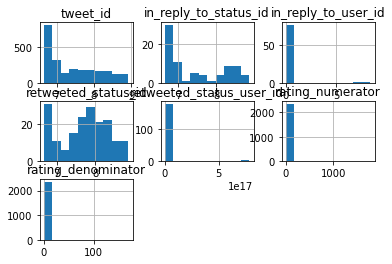

In [133]:
df_arch.hist()

# Cleaning


### Make a copy for for being in the safe side

In [109]:
df_arch_c = df_arch.copy()
df_pred_c = df_pred.copy()
df_j_c = df_j.copy()

In [160]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [165]:
tweets = df_arch_c.merge(df_pred_c, how = 'left', on = 'tweet_id')


In [166]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [168]:
tweets = tweets.merge(df_j_c, how = 'left', on = 'tweet_id')


In [169]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [164]:
tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0


#### Iterate through each row and extract the source's text with beautiful soup

In [173]:
from bs4 import BeautifulSoup as bs

new_source = []
for line, row in tweets.iterrows():
    soup = bs(row.source)
    x = soup.find('a').contents[0]
    new_source.append(x)
    
tweets['source'] = new_source

In [175]:
pd.Series(new_source).value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
dtype: int64

In [178]:
pd.pivot_table(tweets, index=['doggo', 'floofer', 'pupper', 'puppo'],values = 'tweet_id', aggfunc='count')

tweet_id
doggo floofer pupper puppo          
None  None    None   None       1976
                     puppo        29
              pupper None        245
      floofer None   None          9
doggo None    None   None         83
                     puppo         1
              pupper None         12
      floofer None   None          1

#### 4 different columns (doggo, floofer, pupper, and puppo) can be concatenated in just a column.

In [184]:
# Extract doggo, floofer, pupper and puppo columns into new 'dog_stage' column 
tweets['doggy_meter'] = tweets['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [190]:
# Drop doggo, floofer, pupper, and puppo columns
tweets= tweets.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [192]:
tweets.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,doggy_meter
2303,666996132027977728,NaN,NaN,2015-11-18 15:07:24 +0000,Twitter for iPhone,This is Carll. He wants to be a donkey. But al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666996132...,...,False,Rottweiler,6.248990e-02,True,water_buffalo,4.842470e-02,False,102.0,258.0,NaN
281,839290600511926273,NaN,NaN,2017-03-08 01:44:07 +0000,Twitter for iPhone,RT @alexmartindawg: THE DRINK IS DR. PUPPER 10...,8.392899e+17,4.119842e+07,2017-03-08 01:41:24 +0000,https://twitter.com/alexmartindawg/status/8392...,...,False,monitor,1.015650e-01,False,screen,7.530610e-02,False,158.0,0.0,NaN
213,851591660324737024,NaN,NaN,2017-04-11 00:24:08 +0000,Twitter for iPhone,Oh jeez u did me quite the spook little fella....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/851591660...,...,True,Chihuahua,7.725400e-02,True,French_bulldog,7.655880e-02,True,3819.0,17300.0,NaN
1369,702332542343577600,NaN,NaN,2016-02-24 03:21:41 +0000,Vine - Make a Scene,This is Rudy. He's going to be a star. 13/10 t...,NaN,NaN,NaN,https://vine.co/v/irlDujgwOjd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1755.0,3491.0,NaN
1482,693267061318012928,NaN,NaN,2016-01-30 02:58:42 +0000,Vine - Make a Scene,This is Oscar. He can wave. Friendly af. 12/10...,NaN,NaN,NaN,https://vine.co/v/i5n2irFUYWv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,925.0,2622.0,NaN
206,852672615818899456,NaN,NaN,2017-04-13 23:59:28 +0000,Twitter for iPhone,This is Aspen. She's never tasted a stick so s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852672615...,...,True,otterhound,6.823470e-02,True,Sussex_spaniel,4.656170e-02,True,2388.0,15939.0,NaN
2253,667793409583771648,NaN,NaN,2015-11-20 19:55:30 +0000,Twitter for iPhone,Dogs only please. Small cows and other non can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667793409...,...,True,English_setter,4.512190e-01,True,Great_Dane,8.163610e-03,True,358.0,736.0,NaN
1453,695629776980148225,NaN,NaN,2016-02-05 15:27:17 +0000,Twitter for iPhone,Meet Calvin. He's proof that degrees mean abso...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695629776...,...,True,otterhound,2.321170e-01,True,West_Highland_white_terrier,1.286670e-02,True,2377.0,5020.0,NaN
1641,684122891630342144,NaN,NaN,2016-01-04 21:23:02 +0000,Twitter for iPhone,Heartwarming scene of two pups that want nothi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684122891...,...,False,Arabian_camel,4.697610e-02,False,jaguar,2.578480e-02,False,539.0,2176.0,NaN
1361,703079050210877440,NaN,NaN,2016-02-26 04:48:02 +0000,Twitter for iPhone,This is a Butternut Cumberfloof. It's not wind...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703079050...,...,True,Shetland_sheepdog,9.383390e-02,True,Cardigan,6.029640e-02,True,3494.0,8064.0,NaN


In [ ]:
some unusefull columns needed to be droped

In [201]:
tweets = tweets.drop(['retweeted_status_user_id', 
                        'retweeted_status_timestamp',
                          'in_reply_to_status_id',
                          'in_reply_to_user_id',
                        'retweeted_status_id' ], axis=1)

KeyError: "['retweeted_status_user_id' 'retweeted_status_timestamp'\n 'in_reply_to_status_id' 'in_reply_to_user_id'] not found in axis"

##### timestamp is object, not a datatime and needed to be converted

In [198]:
tweets['timestamp'] = pd.to_datetime(tweets['timestamp'])

In [204]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   jpg_url             2075 non-null   object             
 9   img_num             2075 non-null   float64            
 10  p1                  2075 non-null   object             
 11  p1_conf             2075 non-null   float64            
 12  p1_dog              2075 non-null 

##### we only need original tweets with images, witch make we drop tweets without images('expanded_urls' is NaN)

In [206]:
tweets= tweets.dropna(subset = ['expanded_urls'])

In [207]:
tweets.expanded_urls.isnull().sum()

0

In [ ]:
Some string in p1, p2 and p3 are captalizaed, and some are not.

In [208]:
tweets['p1'] = tweets['p1'].str.lower()
tweets['p2'] = tweets['p2'].str.lower()
tweets['p3'] = tweets['p3'].str.lower()

In [212]:
tweets['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [213]:
tweets.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,doggy_meter
1103,735256018284875776,2016-05-24 23:47:49+00:00,Twitter for iPhone,This is Kellogg. He accidentally opened the fr...,https://twitter.com/dog_rates/status/735256018...,8,10,Kellogg,https://pbs.twimg.com/media/CjQnclkVEAA4pnK.jpg,1.0,...,True,french_bulldog,0.351104,True,doormat,0.028075,False,993.0,3675.0,doggo
